In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("./summaryTable.csv")
dataset

,Unnamed: 0,FileName,VoiceVote,VoiceLevel,FaceVote,FaceLevel,MultiModalVote,MultiModalLevel
0,1,1001_IEO_NEU_XX,N,69.1,N,92.22,N,64.78
1,2,1001_IEO_HAP_LO,N,71.67,H,57,H,57.38
2,3,1001_IEO_HAP_MD,N,67.71,H,62.62,H,56.56
3,4,1001_IEO_HAP_HI,H,63.5,H,68.25,H,73.2
4,5,1001_IEO_SAD_LO,N,73.71,N,73.5,N,74.8
...,...,...,...,...,...,...,...,...
7437,7438,1091_WSI_HAP_XX,N,68.12,H,65.12,H,64.8
7438,7439,1091_WSI_SAD_XX,N,55.67,N,71.57,N,48.8
7439,7440,1091_WSI_ANG_XX,A,34.4,A,50.43,A,67.11
7440,7441,1091_WSI_FEA_XX,S,39.67,F,68.29,F,51.71


## Voice

In [15]:
vv = dataset["VoiceVote"]
vvc = dataset["VoiceVote"].value_counts()
#vvdf = pd.DataFrame(vvc)
vvdf = pd.DataFrame({'Frequency':vvc})
vvdf.head()

N            3897
A             986
F             645
D             547
S             370
H             353
N:S           114
F:N            93
D:N            81
A:D            73
H:N            73
A:N            38
F:S            28
D:F            17
A:F            14
A:D:N          13
D:S            12
F:H            11
F:N:S          11
A:H            10
D:F:N           8
D:H             5
A:H:N           5
D:N:S           5
A:D:F:N         4
F:H:N           4
D:F:S           3
A:S             3
A:F:N           3
D:H:N           3
H:N:S           3
H:S             2
D:F:N:S         2
A:D:H:N         1
D:F:H:N         1
F:H:N:S         1
A:D:F:N:S       1
A:N:S           1
A:D:N:S         1
Name: VoiceVote, dtype: int64

<AxesSubplot:title={'center':'Voice Emotion Frequency'}>

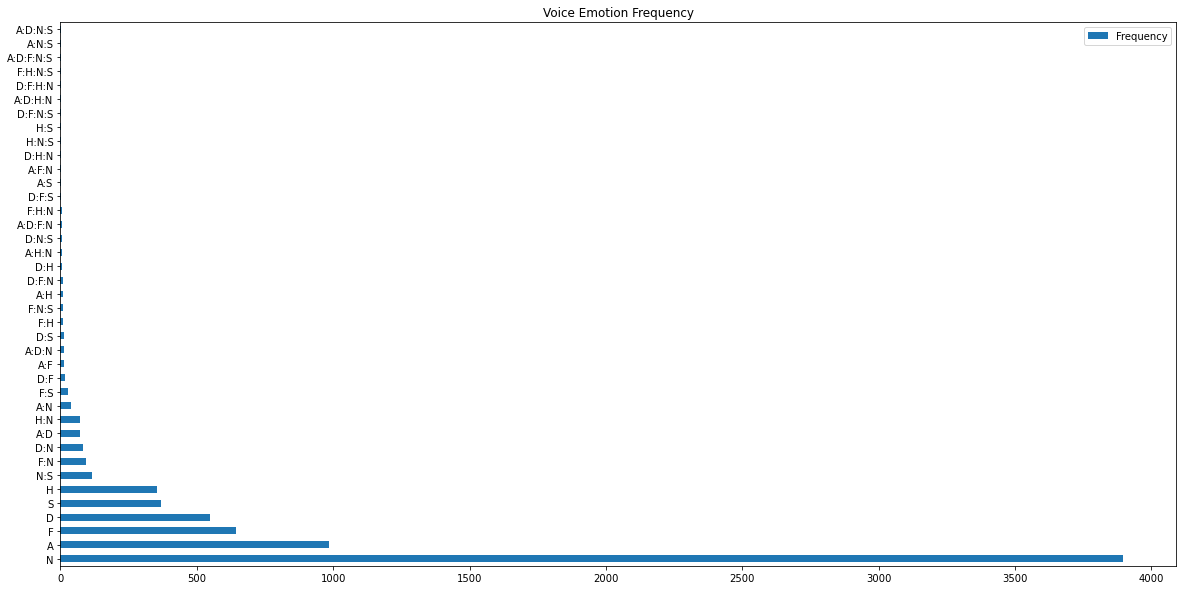

In [21]:
# Graph 
vvdf.plot(kind="barh", figsize=(20,10), title="Voice Emotion Frequency")

In [6]:
per = vv.value_counts(normalize=True) * 100

vvdf['Percent'] = per
vvdf.head()

,Frequency,Percent
N,3897,52.364956
A,986,13.249127
F,645,8.667025
D,547,7.350175
S,370,4.971782


## Face

In [7]:
fv = dataset["FaceVote"]
fvc = dataset["FaceVote"].value_counts()
fvdf = pd.DataFrame({'Frequency':fvc})
fvdf.head()

,Frequency
N,2076
H,1266
D,1057
A,968
F,822


<AxesSubplot:title={'center':'Face Emotion Frequency'}>

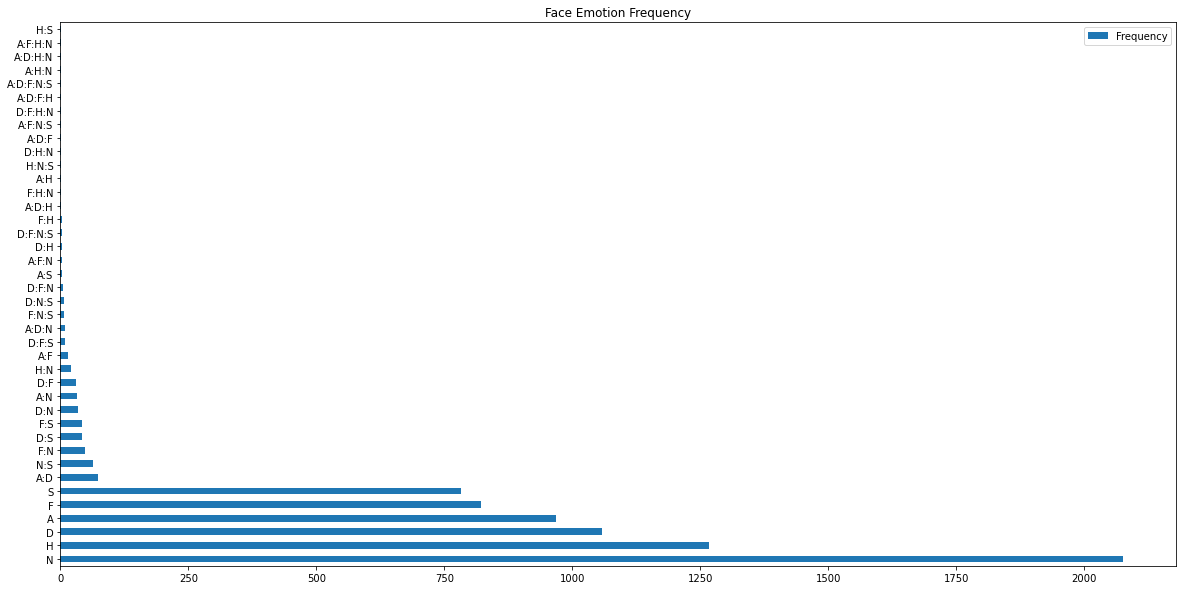

In [8]:
# Graph 
fvdf.plot(kind="barh", figsize=(20,10), title="Face Emotion Frequency")

In [9]:
per = fv.value_counts(normalize=True) * 100

fvdf['Percent'] = per
fvdf.head()

,Frequency,Percent
N,2076,27.895727
H,1266,17.011556
D,1057,14.203171
A,968,13.007256
F,822,11.045418


## MultiModal (Voice and Face)

In [10]:
mv = dataset["MultiModalVote"]
mvc = dataset["MultiModalVote"].value_counts()
mvdf = pd.DataFrame({'Frequency':mvc})
mvdf.head()

,Frequency
N,1972
H,1219
D,1139
F,1084
A,1019


<AxesSubplot:title={'center':'Multi-modal Emotion Frequency'}>

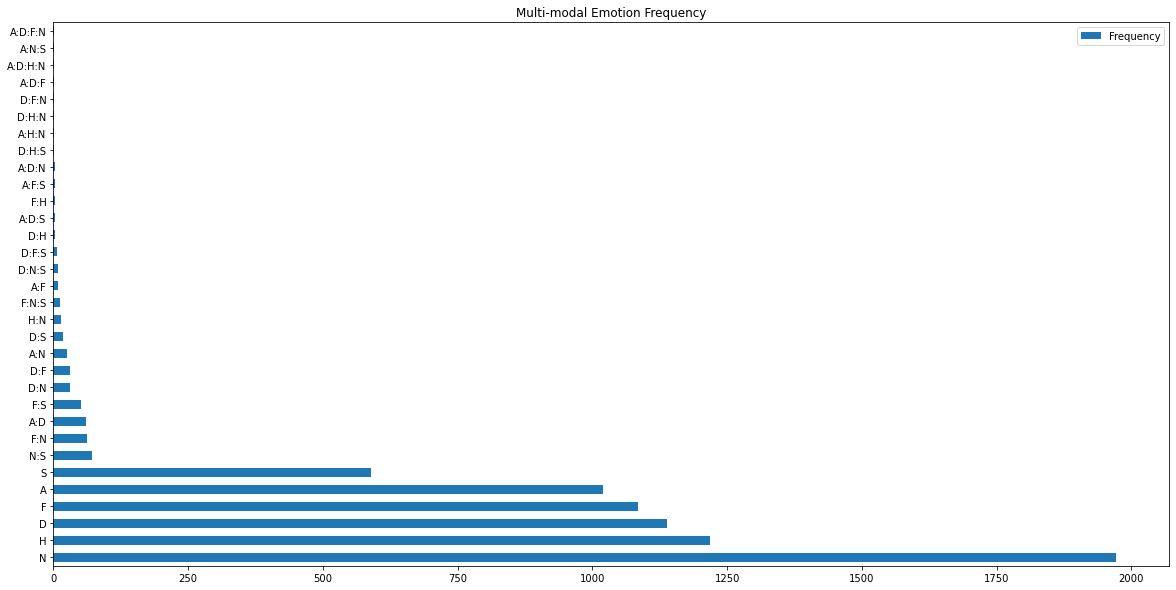

In [11]:
# Graph 
mvdf.plot(kind="barh", figsize=(20,10), title="Multi-modal Emotion Frequency")

In [12]:
per = mv.value_counts(normalize=True) * 100

mvdf['Percent'] = per
mvdf.head()

,Frequency,Percent
N,1972,26.498253
H,1219,16.380005
D,1139,15.305026
F,1084,14.565977
A,1019,13.692556


In [73]:
df = pd.DataFrame({'Voice':vvdf["Frequency"], 'Face':fvdf["Frequency"], 'Multimodal':mvdf["Frequency"]})
df = df.T
df = df.fillna(0)
df

,A,A:D,A:D:F,A:D:F:H,A:D:F:N,A:D:F:N:S,A:D:H,A:D:H:N,A:D:N,A:D:N:S,...,F:N,F:N:S,F:S,H,H:N,H:N:S,H:S,N,N:S,S
Voice,986.0,73.0,0.0,0.0,4.0,1.0,0.0,1.0,13.0,1.0,...,93.0,11.0,28.0,353.0,73.0,3.0,2.0,3897.0,114.0,370.0
Face,968.0,73.0,1.0,1.0,0.0,1.0,2.0,1.0,8.0,0.0,...,47.0,7.0,42.0,1266.0,21.0,1.0,1.0,2076.0,63.0,783.0
Multimodal,1019.0,60.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,...,62.0,12.0,51.0,1219.0,14.0,0.0,0.0,1972.0,71.0,589.0


In [74]:
df = pd.DataFrame({'Anger':df["A"], 'Disgust':df["D"], 'Fear':df["F"], 'Sad':df["S"], 'Happy':df["H"], 'Neutral':df["N"]})
df

,Anger,Disgust,Fear,Sad,Happy,Neutral
Voice,986.0,547.0,645.0,370.0,353.0,3897.0
Face,968.0,1057.0,822.0,783.0,1266.0,2076.0
Multimodal,1019.0,1139.0,1084.0,589.0,1219.0,1972.0


<AxesSubplot:title={'center':'Distribution of Emotions per Modality'}>

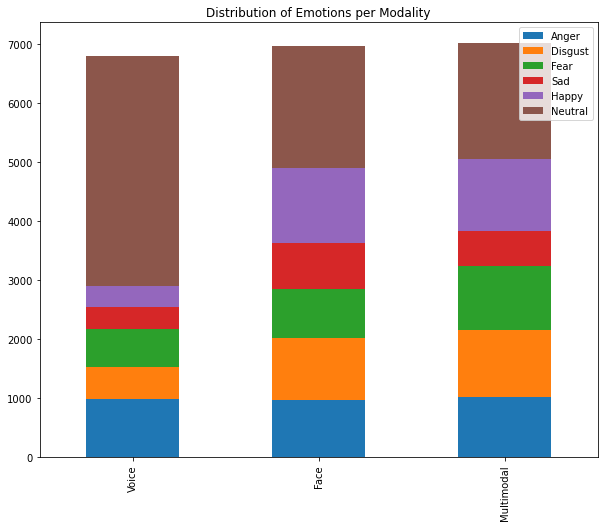

In [80]:
df.plot(kind='bar', stacked=True, title='Distribution of Emotions per Modality', figsize=(10,8))